# Evaluation - Approach 2

## Pathway cases Evaluation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support

#### Load the results from Approach 2, pathway cases

In [2]:
# Load the dataset 
file_path = r"C:\Users\iratx\OneDrive\Documents\Máster\Segundo año\Segundo semestre\TFM\resultados_nuevo\approach2_pathway_results.csv"
df = pd.read_csv(file_path, sep=",")

df.head(20)

,Case_No,Prompt,LLM,Ground Truth,Prediction
0,1,P1,GPT-4o,1,1
1,2,P1,GPT-4o,1,1
2,3,P1,GPT-4o,1,1
3,4,P1,GPT-4o,1,1
4,5,P1,GPT-4o,1,1
5,6,P1,GPT-4o,0,0
6,7,P1,GPT-4o,0,0
7,8,P1,GPT-4o,0,0
8,9,P1,GPT-4o,0,0
9,10,P1,GPT-4o,0,0


#### Compute the performance metrics

In [3]:
# List of unique prompts and LLMs
prompts = df["Prompt"].unique()
llms = df["LLM"].unique()

# Store results
metrics = []

In [4]:
# Filter for pathway-based cases only (1 to 40)
df_pathway = df[df["Case_No"] <= 40]

# Initialize list for storing results
metrics_pathway = []

# Compute metrics for each (Prompt, LLM) combination on pathway cases
for prompt in prompts:
    for llm in llms:
        subset = df_pathway[(df_pathway["Prompt"] == prompt) & (df_pathway["LLM"] == llm)]
        
        y_true = subset["Ground Truth"]
        y_pred = subset["Prediction"]
        
        acc = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred, zero_division=0)
        rec = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)
        
        metrics_pathway.append([prompt, llm, acc, prec, rec, f1])

# Convert to DataFrame
metrics_pathway_df = pd.DataFrame(metrics_pathway, columns=["Prompt", "LLM", "Accuracy", "Precision", "Recall", "F1 Score"])

# Save results to a CSV file
metrics_pathway_df.to_csv("approach2_pathway_evaluation.csv", index=False)

# Print summary
print(metrics_pathway_df)

   Prompt       LLM  Accuracy  Precision  Recall  F1 Score
0      P1    GPT-4o     0.950   0.909091    1.00  0.952381
1      P1  Claude-3     0.650   0.625000    0.75  0.681818
2      P1  Gemini-2     0.725   0.666667    0.90  0.765957
3      P1  DeepSeek     0.775   0.689655    1.00  0.816327
4      P2    GPT-4o     0.850   0.769231    1.00  0.869565
5      P2  Claude-3     0.650   0.625000    0.75  0.681818
6      P2  Gemini-2     0.625   0.592593    0.80  0.680851
7      P2  DeepSeek     0.725   0.645161    1.00  0.784314
8      P3    GPT-4o     0.775   0.689655    1.00  0.816327
9      P3  Claude-3     0.650   0.615385    0.80  0.695652
10     P3  Gemini-2     0.725   0.680000    0.85  0.755556
11     P3  DeepSeek     0.725   0.655172    0.95  0.775510
12     P4    GPT-4o     0.850   0.888889    0.80  0.842105
13     P4  Claude-3     0.825   0.782609    0.90  0.837209
14     P4  Gemini-2     0.825   0.740741    1.00  0.851064
15     P4  DeepSeek     0.850   0.818182    0.90  0.8571

#### Visualization of the results

C:\Users\iratx\AppData\Local\Temp\ipykernel_22440\528933092.py:4: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.barplot(data=metrics_pathway_df, x="Prompt", y="F1 Score", hue="LLM", palette=colorblind_palette, edgecolor='none')


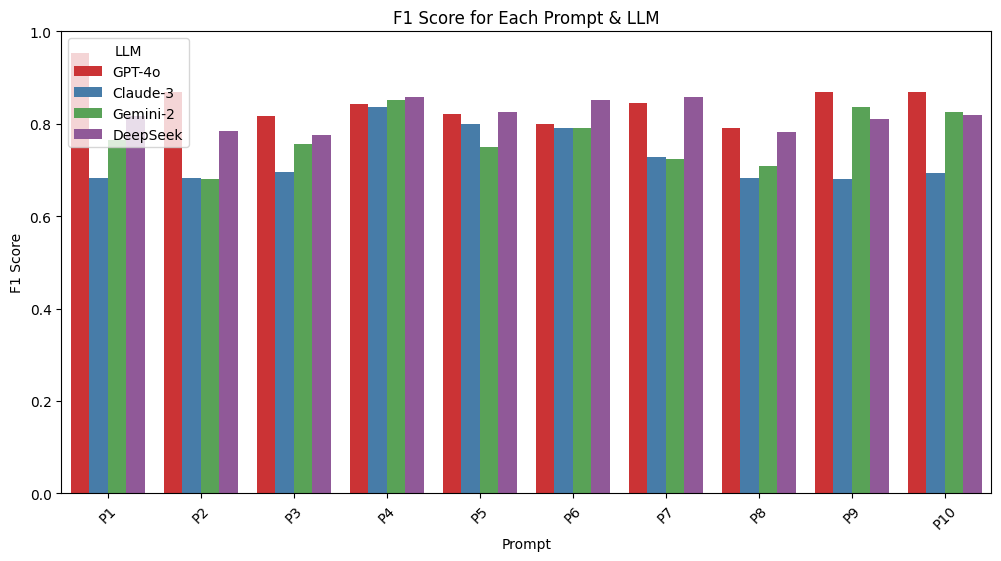

In [5]:
# Visualization
plt.figure(figsize=(12, 6))
colorblind_palette = sns.color_palette("Set1")  # Colorblind-friendly colors
sns.barplot(data=metrics_pathway_df, x="Prompt", y="F1 Score", hue="LLM", palette=colorblind_palette, edgecolor='none')
plt.xticks(rotation=45)
plt.title("F1 Score for Each Prompt & LLM")
plt.legend(title="LLM")
plt.show()

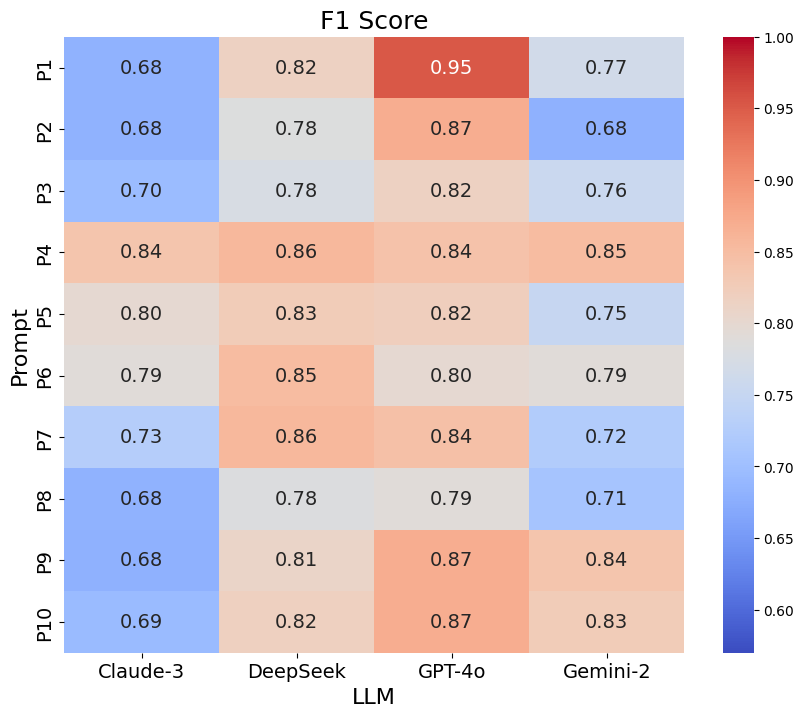

In [7]:
# Convert Prompt column to a categorical type with correct numerical ordering
metrics_pathway_df["Prompt"] = pd.Categorical(metrics_pathway_df["Prompt"], 
                                      categories=sorted(metrics_pathway_df["Prompt"].unique(), 
                                                        key=lambda x: int(x[1:])), 
                                      ordered=True)

# Re-sort DataFrame based on the new categorical order
metrics_pathway_df = metrics_pathway_df.sort_values("Prompt")

# Create the heatmap again
#pivot_df = metrics_pathway_df.pivot(index="Prompt", columns="LLM", values="F1 Score")

#plt.figure(figsize=(10, 8))
#sns.heatmap(pivot_df, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 14})  # Increase annotation size

# Increase font size for labels and title
#plt.title("F1 Score", fontsize=18)
#plt.xlabel("LLM", fontsize=16)
#plt.ylabel("Prompt", fontsize=16)

# Adjust tick parameters for better visibility
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)

#plt.show()


# Create heatmap for Approach 2
plt.figure(figsize=(10, 8))
sns.heatmap(metrics_pathway_df.pivot(index="Prompt", columns="LLM", values="F1 Score"),
            annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 14},
            vmin=0.57, vmax=1)
plt.title("F1 Score", fontsize=18)
plt.xlabel("LLM", fontsize=16)
plt.ylabel("Prompt", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

C:\Users\iratx\AppData\Local\Temp\ipykernel_27396\1312530303.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prompt_means = df.groupby("Prompt")[["Accuracy", "Precision", "Recall", "F1 Score"]].mean()
C:\Users\iratx\AppData\Local\Temp\ipykernel_27396\1312530303.py:30: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.barplot(data=df, x="Prompt", y=metric, hue="LLM", ax=ax, palette=colorblind_palette, edgecolor='none')  # Remove borders
C:\Users\iratx\AppData\Local\Temp\ipykernel_27396\1312530303.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=14)
C:\Users\iratx\AppData\Local\Temp\ipykernel_2739

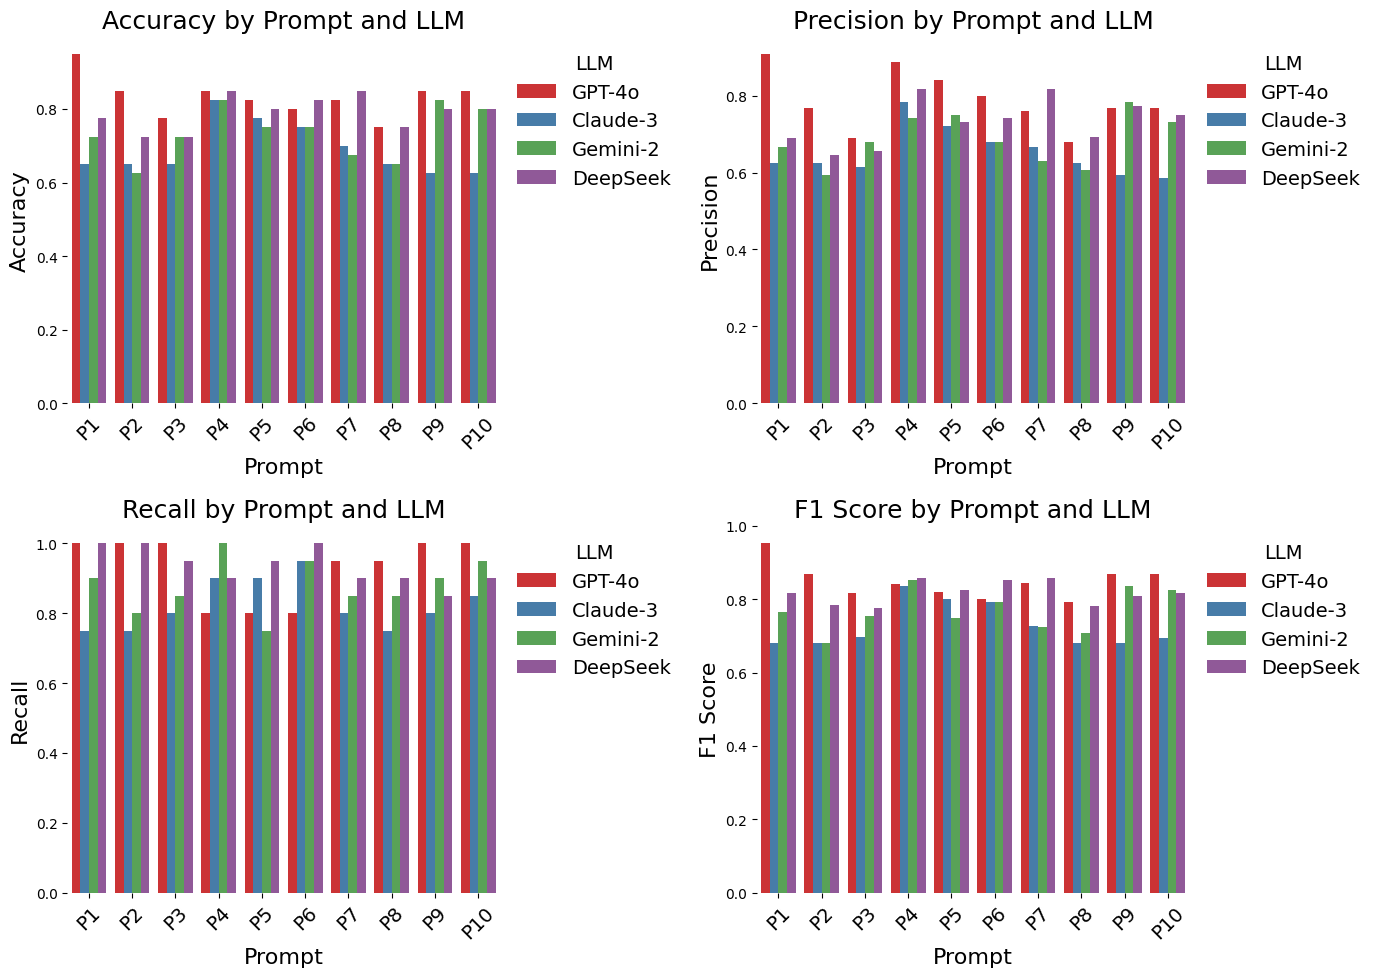

Mean scores per LLM:
           Accuracy  Precision  Recall  F1 Score
LLM                                            
Claude-3    0.6900   0.651703   0.825  0.727198
DeepSeek    0.7900   0.731290   0.935  0.817790
GPT-4o      0.8325   0.787600   0.930  0.847613
Gemini-2    0.7350   0.685872   0.880  0.769013

Mean scores per Prompt:
         Accuracy  Precision  Recall  F1 Score
Prompt                                       
P1       0.77500   0.722603  0.9125  0.804121
P2       0.71250   0.657996  0.8875  0.754137
P3       0.71875   0.660053  0.9000  0.760761
P4       0.83750   0.807605  0.9000  0.846880
P5       0.78750   0.760719  0.8500  0.799150
P6       0.78125   0.724471  0.9250  0.808599
P7       0.76250   0.718620  0.8750  0.788066
P8       0.70000   0.650755  0.8625  0.741107
P9       0.77500   0.729290  0.8875  0.799287
P10      0.76875   0.709052  0.9250  0.801928


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "approach2_pathway_evaluation.csv"
df = pd.read_csv(file_path)

# Ensure the 'Prompt' column is sorted numerically
df["Prompt"] = pd.Categorical(df["Prompt"], 
                              categories=sorted(df["Prompt"].unique(), key=lambda x: int(x[1:])), 
                              ordered=True)

# Compute mean scores per LLM
llm_means = df.groupby("LLM")[["Accuracy", "Precision", "Recall", "F1 Score"]].mean()

# Compute mean scores per Prompt (and sort it correctly)
prompt_means = df.groupby("Prompt")[["Accuracy", "Precision", "Recall", "F1 Score"]].mean()
prompt_means = prompt_means.sort_index()  # Ensures P10 comes after P9

# Visualization: 2x2 bar plot grid with colorblind-friendly palette
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
colorblind_palette = sns.color_palette("Set1")  # Colorblind-friendly colors

# Set font size for all texts
plt.rcParams.update({'font.size': 14})

for ax, metric in zip(axes.flatten(), metrics):
    sns.barplot(data=df, x="Prompt", y=metric, hue="LLM", ax=ax, palette=colorblind_palette, edgecolor='none')  # Remove borders
    ax.set_title(f"{metric} by Prompt and LLM", fontsize=18)
    ax.set_xlabel("Prompt", fontsize=16)
    ax.set_ylabel(metric, fontsize=16)
    ax.legend(title="LLM", bbox_to_anchor=(1, 1), fontsize=14, frameon=False)  # Remove legend frame
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=14)

    # Add values on top of each bar, excluding zero values
    #for p in ax.patches:
    #    height = p.get_height()
    #    if height > 0:  # Only annotate bars with non-zero height
    #        ax.annotate(f'{height:.2f}', 
    #                    (p.get_x() + p.get_width() / 2., height), 
    #                    ha='center', va='center', 
    #                    fontsize=12, color='black', 
    #                    xytext=(0, 8), textcoords='offset points')

# Remove the borders around the plot area
for ax in axes.flatten():
    for sp in ax.spines.values():
        sp.set_visible(False)

plt.tight_layout()
plt.show()

# Display mean scores for insights
print("Mean scores per LLM:\n", llm_means)
print("\nMean scores per Prompt:\n", prompt_means)

## Benchmark cases Comparison

#### Load the results from Approach 2, benchmarking cases

In [8]:
# Load the dataset (Make sure to update the filename if needed)
file_path = r"C:\Users\iratx\OneDrive\Documents\Máster\Segundo año\Segundo semestre\TFM\resultados_nuevo\approach2_benchmarking_results.csv"
df = pd.read_csv(file_path, sep=",")

df.head(20)

,Case_No,Prompt,LLM,Ground Truth,Prediction
0,41,P1,GPT-4o,1,1
1,42,P1,GPT-4o,1,1
2,43,P1,GPT-4o,1,1
3,44,P1,GPT-4o,1,1
4,45,P1,GPT-4o,1,1
5,46,P1,GPT-4o,1,1
6,47,P1,GPT-4o,1,1
7,48,P1,GPT-4o,0,0
8,49,P1,GPT-4o,0,0
9,50,P1,GPT-4o,0,0


#### Calculate the performance metrics

In [9]:
# Filter for benchmark-based cases only (41 to 60)
df_benchmark = df[df["Case_No"] > 40]

# Initialize list for storing results
metrics_benchmark = []

# Compute **weighted** metrics for each (Prompt, LLM) combination
for prompt in prompts:
    for llm in llms:
        subset = df_benchmark[(df_benchmark["Prompt"] == prompt) & (df_benchmark["LLM"] == llm)]
        
        y_true = subset["Ground Truth"]
        y_pred = subset["Prediction"]
        
        acc = accuracy_score(y_true, y_pred)
        prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted", zero_division=0)
        
        metrics_benchmark.append([prompt, llm, acc, prec, rec, f1])

# Convert to DataFrame
metrics_benchmark_df = pd.DataFrame(metrics_benchmark, columns=["Prompt", "LLM", "Accuracy", "Precision", "Recall", "F1 Score"])

# Save results to a CSV file
metrics_benchmark_df.to_csv("Updated_benchmark_cases_evaluation_results.csv", index=False)

# Print summary
print(metrics_benchmark_df)

   Prompt       LLM  Accuracy  Precision  Recall  F1 Score
0      P1    GPT-4o      1.00   1.000000    1.00  1.000000
1      P1  Claude-3      1.00   1.000000    1.00  1.000000
2      P1  Gemini-2      1.00   1.000000    1.00  1.000000
3      P1  DeepSeek      0.90   0.912500    0.90  0.893333
4      P2    GPT-4o      1.00   1.000000    1.00  1.000000
5      P2  Claude-3      0.90   0.900000    0.90  0.900000
6      P2  Gemini-2      1.00   1.000000    1.00  1.000000
7      P2  DeepSeek      0.90   0.912500    0.90  0.893333
8      P3    GPT-4o      0.95   0.953333    0.95  0.948589
9      P3  Claude-3      1.00   1.000000    1.00  1.000000
10     P3  Gemini-2      0.90   0.912500    0.90  0.893333
11     P3  DeepSeek      0.90   0.912500    0.90  0.893333
12     P4    GPT-4o      0.95   0.953333    0.95  0.948589
13     P4  Claude-3      1.00   1.000000    1.00  1.000000
14     P4  Gemini-2      1.00   1.000000    1.00  1.000000
15     P4  DeepSeek      0.95   0.953333    0.95  0.9485

#### Carry out statistical testing

In [ ]:
# Carry out Shapiro-Wilk test for normality

from scipy.stats import shapiro

# Loop over each LLM and metric
for llm in llms:
    for metric in metrics:
        benchmark_vals = metrics_benchmark_df[metrics_benchmark_df["LLM"] == llm][metric].dropna()
        pathway_vals = metrics_pathway_df[metrics_pathway_df["LLM"] == llm][metric].dropna()

        # Combine both benchmark and pathway values for Shapiro Test
        combined_vals = pd.concat([benchmark_vals, pathway_vals])

        # Perform Shapiro-Wilk Test for normality
        if len(combined_vals) > 3:  # Shapiro-Wilk test requires at least 3 data points
            stat, p_value = shapiro(combined_vals)
            print(f"Shapiro-Wilk Test for LLM: {llm}, Metric: {metric}")
            print(f"Test Statistic: {stat}, P-value: {p_value}")
            if p_value > 0.05:
                print("The data is normally distributed.\n")
            else:
                print("The data is not normally distributed.\n")

Shapiro-Wilk Test for LLM: GPT-4o, Metric: Accuracy
Test Statistic: 0.8810987841177005, P-value: 0.018517063491673067
The data is not normally distributed.

Shapiro-Wilk Test for LLM: GPT-4o, Metric: Precision
Test Statistic: 0.8709879990056979, P-value: 0.012228814277696815
The data is not normally distributed.

Shapiro-Wilk Test for LLM: GPT-4o, Metric: Recall
Test Statistic: 0.6775046901398976, P-value: 2.0992933974376738e-05
The data is not normally distributed.

Shapiro-Wilk Test for LLM: GPT-4o, Metric: F1 Score
Test Statistic: 0.8753838096061656, P-value: 0.01462879955509088
The data is not normally distributed.

Shapiro-Wilk Test for LLM: Claude-3, Metric: Accuracy
Test Statistic: 0.8294519764271666, P-value: 0.002458942036732413
The data is not normally distributed.

Shapiro-Wilk Test for LLM: Claude-3, Metric: Precision
Test Statistic: 0.8129559508213844, P-value: 0.001356857837460161
The data is not normally distributed.

Shapiro-Wilk Test for LLM: Claude-3, Metric: Recall
T

In [11]:
# Carry out Mann-Whitney U test for statistical significance

import pandas as pd
from scipy.stats import mannwhitneyu

# Define metrics
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Initialize a list to store results
mannwhitney_llm_results = []

# Get unique LLMs from the benchmark set (they should match with the pathway set)
llms = metrics_benchmark_df["LLM"].unique()

# Loop over each LLM
for llm in llms:
    for metric in metrics:
        benchmark_vals = metrics_benchmark_df[metrics_benchmark_df["LLM"] == llm][metric].dropna()
        pathway_vals = metrics_pathway_df[metrics_pathway_df["LLM"] == llm][metric].dropna()
        
        if len(benchmark_vals) > 1 and len(pathway_vals) > 1:  # Check if there are enough points
            # Perform Mann-Whitney U test for unpaired data
            stat, p_value = mannwhitneyu(benchmark_vals, pathway_vals, alternative='two-sided')
            
            mannwhitney_llm_results.append({
                "LLM": llm,
                "Metric": metric,
                "Test Statistic": stat,
                "P-Value": p_value,
                "Significant": "Yes" if p_value < 0.05 else "No"
            })

# Create a DataFrame for the results
df_llm_results = pd.DataFrame(mannwhitney_llm_results)

# Show the results
print(df_llm_results)

         LLM     Metric  Test Statistic   P-Value Significant
0     GPT-4o   Accuracy            97.5  0.000283         Yes
1     GPT-4o  Precision           100.0  0.000142         Yes
2     GPT-4o     Recall            60.0  0.426775          No
3     GPT-4o   F1 Score            96.0  0.000471         Yes
4   Claude-3   Accuracy           100.0  0.000138         Yes
5   Claude-3  Precision           100.0  0.000145         Yes
6   Claude-3     Recall            95.0  0.000585         Yes
7   Claude-3   F1 Score           100.0  0.000145         Yes
8   Gemini-2   Accuracy           100.0  0.000129         Yes
9   Gemini-2  Precision           100.0  0.000131         Yes
10  Gemini-2     Recall            86.5  0.004624         Yes
11  Gemini-2   F1 Score           100.0  0.000131         Yes
12  DeepSeek   Accuracy           100.0  0.000153         Yes
13  DeepSeek  Precision           100.0  0.000157         Yes
14  DeepSeek     Recall            52.5  0.871670          No
15  Deep